### <i>Jakub Mijas 235924</i>
## Projekt Zaliczeniowy z przedmiotu Analiza Danych - klasyfikator satysfakcji pasażerów linii lotniczej
### Celem tego projektu znalezienie cechy ,lub też zestawu cech, dzięki którym będziemy mogli dokonać predykcji satysfakcji przyszłych klientów.
Dane które zostaną użyte w trakcie tego projektu, zostały zaimportowane z platformy Kaggle link do nich znajdziemy poniżej:

<a href="url" target="https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?datasetId=522275&sortBy=voteCount">Link do datasetu</a>

W tym datasecie występują następujące kolumny:

 * Płeć : Płeć pasażerów (kobieta, mężczyzna)

 * Typ klienta : Typ klienta (Lojalny klient, nielojalny klient)

 * Wiek: Rzeczywisty wiek pasażerów

 * Rodzaj podróży : Cel lotu pasażerów (Podróż osobista, Podróż służbowa)

 * Klasa : Klasa podróży w samolocie pasażerów (Business, Eco, Eco Plus)

 * Odległość lotu: Odległość lotu tej podróży

 * Wifi podczas lotu : Poziom zadowolenia z wifi podczas lotu 

 * Dogodny czas odlotu/przylotu : Poziom zadowolenia z dogodnego czasu odlotu/przylotu

 * Łatwość rezerwacji online : Poziom satysfakcji z rezerwacji online

 * Lokalizacja bramek: Poziom satysfakcji z lokalizacji bramek

 * Jedzenie i picie : Poziom satysfakcji z Jedzenie i picie.

 * Wejście na pokład przez Internet : Poziom zadowolenia z wejścia na pokład przez Internet

 * Komfort siedzenia : Poziom satysfakcji z komfortu siedzenia

 * Rozrywka podczas lotu : Poziom zadowolenia z rozrywki podczas lotu

 * Obsługa na pokładzie : Poziom satysfakcji z obsługi pokładowej.

 * Obsługa w kabinie pasażerskiej : Poziom satysfakcji z obsługi pokoju na nogi.

 * Obsługa bagażu : Poziom satysfakcji z obsługi bagażu

 * Serwis odprawy biletowo-bagażowej : Poziom satysfakcji z odprawy.

 * Serwis pokładowy : Poziom satysfakcji z serwisu pokładowego.

 * Czystość : Poziom satysfakcji z czystości

 * Opóźnienie odlotu w minutach : Minuty opóźnienia przy odlocie

 * Opóźnienie przylotu w minutach : Minuty opóźnienia przy przyjeździe

* <i><b>Satysfakcja : Poziom satysfakcji z linii lotniczych (zadowolenie, neutralność lub niezadowolenie)</b></i>

Cecha która jest naszą cechą docelową jest Satysfakcja, z perspektywy analizy danych jesteśmy w stanie stwierdzić, iż kolumna z id ,która będzie dopiero dostępna w podglądzie zestawu danych, nie będzie przynosić żadnych korzyści więc bez przeszkód można będzie ją usunąć.
Ze względu na dużą liczbę rekordów wszystkie rekordy posiadające nieprawidłowe dane będą usuwane.

W tym bloku zaimportujemy wszystkie niezbędne bibliotek.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
RSEED = 10

Poniżej zaimportowano wszystkie metryki potrzebne do określania dokładności metod

In [3]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Teraz następuje wczytywanie danych z plików csv.
Zbiór danych został przez autora podzielony na dwa podzbiory testowy oraz treningowy, podział jaki został zastosowany to 20% do 80%

In [4]:
data = pd.read_csv('Dane/train.csv')
data_test = pd.read_csv('Dane/test.csv')
df = data.append(data_test)
print(len(data_test)/len(df))


df.head()

0.2


C:\Users\MeowMias\AppData\Local\Temp\ipykernel_8940\1695318767.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data.append(data_test)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Aby wszystkie dane zawierające pola inne niż liczbowe nie utrudniały dalszej analizy zostaną przekształcone na wartości numeryczne za pomocą poniższych funkcji.

Sprawdźmy teraz nasz zestaw danych pod kątem możliwych korelacji.

C:\Users\MeowMias\AppData\Local\Temp\ipykernel_8940\2191324030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Greens")


<AxesSubplot: >

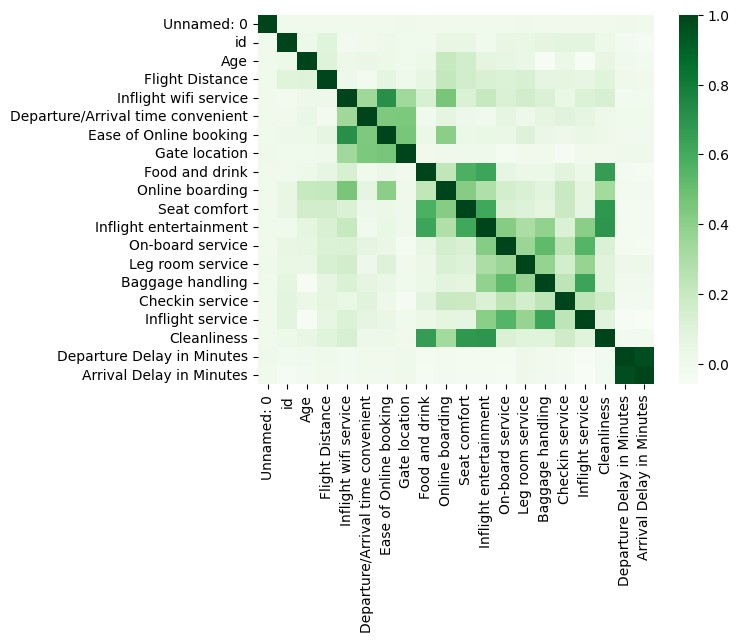

In [5]:
sns.heatmap(df.corr(),cmap="Greens")

W naszym zestawie danych najsilniej skorelowane ze sobą są oczywiście opóźnienie wylotu w minutach oraz opóźnienie przylotu w minutach.
Poza nimi możemy zauważyć drobną korelację między czystością w samolocie a serwowanym jedzeniem i napojami,komfortem siedzenia oraz rozrywką podczas lotu.
Cechy te choć na pozór bardzo się od siebie różnią to w rzeczywistości podzielają jeden wspólny czynnik, obsługę.
Jeżeli obsługa podczas lotu dobrze wykonuje swoje zadanaia to na pokładzie jest czysto, pasażerowie są zadowoleni z jedzenia oraz z rozrywki poczas lotu.
Obsługa bardzo często również rozwiązuje problemy związane właśnie z miejscami jakie zajmują pasażerowie


In [6]:
def gender_trasform(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return - 1

def satisfaction_transform(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return - 1
def travel_type_transform(x):
    if x == 'Personal Travel':
        return 1
    elif x == 'Business travel':
        return 0
    else:
        return - 1
def loyality_transform(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
def class_transform(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0
    else:
        return -1

Teraz dzięki powyżej utworzonym funkcjom jesteśmy w stanie dokonać podtawowego przekształecnia danych.
Na samym początku zajmiemy się usuięciem kolumny zawierającej Unnamed:0 oraz kolumny z ID klienta, gdyż z perspektywy analizy danych, ta informacja nie wnosi nic istotnego w sprawie dalszej analizy.

In [7]:
data = data.drop(['Unnamed: 0', 'id'], axis = 1)
data_test = data_test.drop(['Unnamed: 0', 'id'], axis = 1)

W dalszej części zastosujemy funkcje transforumjące na zbiorze testowym oraz treningowym aby wszystkie nasze dane nasze dane przechowywne były w postaci liczbowej.

In [8]:
data['Gender'] = data['Gender'].apply(gender_trasform)
data['Customer Type'] = data['Customer Type'].apply(loyality_transform)
data['Type of Travel'] = data['Type of Travel'].apply(travel_type_transform)
data['Class'] = data['Class'].apply(class_transform)
data['satisfaction'] = data['satisfaction'].apply(satisfaction_transform)

data_test['Gender'] = data_test['Gender'].apply(gender_trasform)
data_test['Customer Type'] = data_test['Customer Type'].apply(loyality_transform)
data_test['Type of Travel'] = data_test['Type of Travel'].apply(travel_type_transform)
data_test['Class'] = data_test['Class'].apply(class_transform)
data_test['satisfaction'] = data_test['satisfaction'].apply(satisfaction_transform)

In [9]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,1,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,0,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,0,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,0,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,0,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Następnie sprawdźmy czy kolumny Flight Distance, Departure Delay in Minutes oraz Arrival Delay in Minutes zawierają wartości nieokreślone, bądź puste komórki.

In [10]:
if data['Flight Distance'].isnull().values.any():
    print('Należy zająć się kolumną Flight Distance')
else:
    print('Z kolumną Flight Distance wszystko OK')
    
if data['Departure Delay in Minutes'].isnull().values.any():
    print('Należy zająć się kolumną Departure Delay in Minutes')
else:
    print('Z kolumną Departure Delay in Minutes wszystko OK')
    
if data['Arrival Delay in Minutes'].isnull().values.any():
    print('Należy zająć się kolumną Arrival Delay in Minutes')
else:
    print('Z kolumną Arrival Delay in Minutes wszystko OK')
       

Z kolumną Flight Distance wszystko OK
Z kolumną Departure Delay in Minutes wszystko OK
Należy zająć się kolumną Arrival Delay in Minutes


In [11]:
if data_test['Flight Distance'].isnull().values.any():
    print('Należy zająć się kolumną Flight Distance')
else:
    print('Z kolumną Flight Distance wszystko OK')
    
if data_test['Departure Delay in Minutes'].isnull().values.any():
    print('Należy zająć się kolumną Departure Delay in Minutes')
else:
    print('Z kolumną Departure Delay in Minutes wszystko OK')
    
if data_test['Arrival Delay in Minutes'].isnull().values.any():
    print('Należy zająć się kolumną Arrival Delay in Minutes')
else:
    print('Z kolumną Arrival Delay in Minutes wszystko OK')

Z kolumną Flight Distance wszystko OK
Z kolumną Departure Delay in Minutes wszystko OK
Należy zająć się kolumną Arrival Delay in Minutes


In [12]:
new_data = data.dropna(axis = 0, how ='any')
data = new_data

new_data_test = data.dropna(axis = 0, how ='any')
data_test = new_data_test

Aby w dalszej części raportu bez problemów korzystać z kolumn, które zaiwerają wartości liczbowe z dużo większych zakresów niż od 0-5 skorzystamy ze skalowanie , dzięki czemu kolumny takie jak Age, Flight Distance oraz Departure Delay in Minutes staną się prostsze w analizowaniu.


In [13]:
kolumny_test = data_test[['Age', 'Flight Distance', 'Departure Delay in Minutes']]
kolumny_train = data[['Age', 'Flight Distance', 'Departure Delay in Minutes']]

scaler = StandardScaler()
train_skalowane= pd.DataFrame(scaler.fit_transform(kolumny_train), columns = kolumny_train.columns)
test_skalowane = pd.DataFrame(scaler.fit_transform(kolumny_test), columns = kolumny_test.columns)
train_skalowane.head()

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745542,-0.731305,0.268966
1,-0.951526,-0.956916,-0.360682
2,-0.885358,-0.047454,-0.386917
3,-0.951526,-0.629028,-0.098328
4,1.430521,-0.977973,-0.386917


Z racji że liczba usuniętych wierszy jest niewielka w porównaniu z wielkością całego zbioru danych można ją swobodnie usunąć i nie obawiać się o dalsze konsekwencje jakie miałoby to nieść za sobą.

Skoro dokonaliśmy podstawowego czyszczenia danych , należałoby również sprawdzić czy dalsza ich analiza ma jakikolwiek sens.
Jednym z czynników który determinuje,czy dane nadają się do kategoryzacji jest różnorodność wyników.

Nasz klasyfikator będzie miał za zadanie wyznaczyć jaka cecha najistotniej wpływa na satysfakcję pasażerów podczas lotu, należałoby zatem sprawdzić czy pasażerowie równie często są zadowoleni co i zawiedzeni z usług podniebnego przewoźnika

Różnorodność wyników zobrazuje poniższy wykres

[Text(0, 0, '58697 (57%)'), Text(0, 0, '44897 (43%)')]

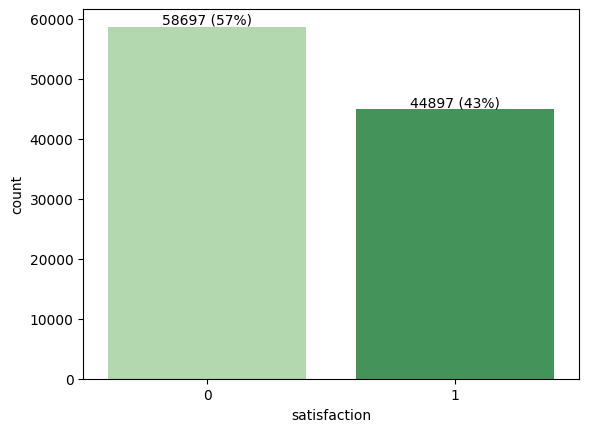

In [20]:
ax =sns.countplot(x='satisfaction' , data = data , palette = 'Greens')

sat_values_abs =  data['satisfaction'].value_counts(ascending=False)
sat_values_rel = data['satisfaction'].value_counts(ascending=False,normalize=True).values * 100

sat_labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(sat_values_abs, sat_values_rel)]
ax.bar_label(container=ax.containers[0], labels=sat_labels)

Rozkład wartości współczynnika satysfakcji jest dość zbliżony, oba wyniki oscylują w okolicach 45-55 % zartem dane możemy bez przeszkód poddać dalszej analizie.
Aby zobrazować jak cechy wyrażane wartościami innymi niż liczbowe determinują satysfakcję pasażera posłużę się poniższymi wykresami.

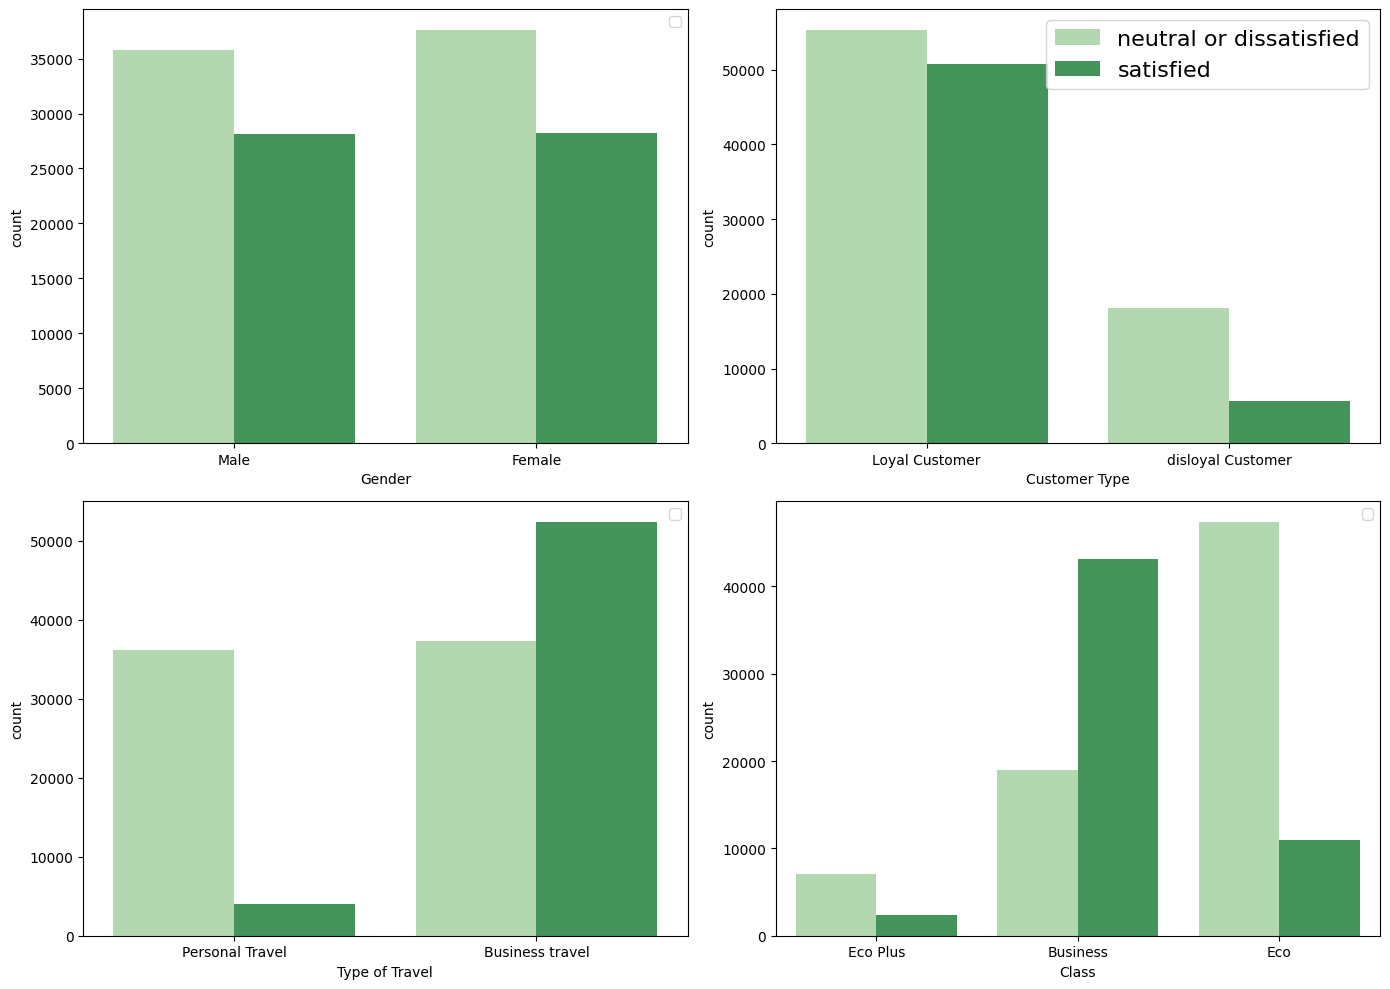

In [21]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.ravel()

i=0
for col in cat_cols:
    
    plt.subplot(2, 2, i+1)
    
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = df , palette = 'Greens')
    
    ax.legend('')
    
    i += 1
    
axs[1].legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()

Spoglądając na powyższe wykresy można zaobserwować następujące zależności:

1 Płeć pasażera jest cechą słabo determinującą satysfakcję, co za tym idzie nie będziemy się na niej skupiać w dalszej części analizy

2 Można zaobserwować większe niezadowolenie ze strony nielojalnych klientów, to czy ta cecha ma istotny wpływ zbadamy w dalszej części pracy

3 Zarówno typ podróży jak i klasa którą leciał dany pasażer są cechami, które w dalszej części klasyfikacji weźmiemy pod uwagę

Uzbrojeni w tą wiedzę zaczniemy poszukiwania cechy która najlepiej determinuje czy dany pasażer będzie zadowolony ze swojego przelotu.
Aby to zrobić posłużę się metodą Lasów Losowych i otrzymane wyniki przedstawie za pomocą wykresu.

Najpierw podzielmy nasz zbiór na podzbiory treningowe i testowe oraz wydobądźmy z nich kolumnę docelową którą u nas jest współczynnik satysfakcji.


In [16]:
X_train = data.drop(['satisfaction'], axis=1)
Y_train = data['satisfaction']
X_test = data_test.drop(['satisfaction'], axis=1)
Y_test = data_test['satisfaction']

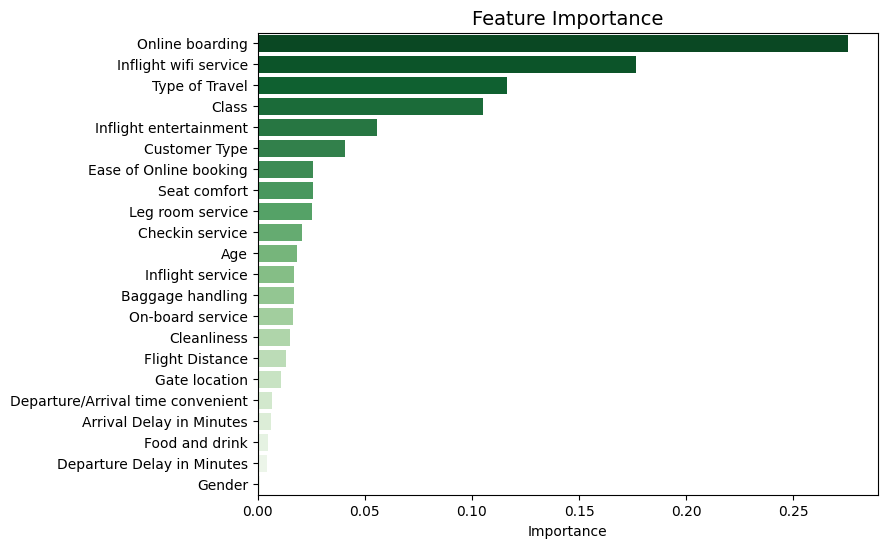

In [23]:
rf_class = RandomForestClassifier()
parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
    'max_features': [5, 10]
}

grid_search = GridSearchCV(estimator=rf_class, param_grid=parameters_grid, cv=10, n_jobs=-1)

grid_search.fit(X_train, Y_train)

imp = pd.DataFrame(grid_search.best_estimator_.fit(X_train, Y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance',ascending = False)

plt.figure(figsize=(8, 6))
sns.barplot(x=imp['Importance'], y=imp.index, palette='Greens_r')
plt.title('Feature Importance', fontsize=14)
plt.show()

Jak możemy zaobserwować zaobserwować z powyższego wykresu cechami, które najlepiej kategoryzują dane to:
* Online boarding
* Inflight wifi service
* Class
* Type of Travel

Skoro w wyniku analizy doszliśmy do tego jakie cechy są tymi najlepiej kategoryzującymi, to warto sprawdzić jak z naszymi danymi radzą sobie różne klasyfikatory.
W tym projekcie zostały użyte dwa klasyfikatory:
* Klasyfikator N-Sąsiadów
* Naiwny Klasyfikator Bayesa

Klasyfikator K Najbliższych Sąsiadów
Accuracy: 0.8375774658764021
Precision: 0.8392101892355657
Roc Auc Score: 0.8300349500469185
Confusion Matrix: [[52044  6653]
 [10173 34724]]

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     58697
           1       0.84      0.77      0.80     44897

    accuracy                           0.84    103594
   macro avg       0.84      0.83      0.83    103594
weighted avg       0.84      0.84      0.84    103594




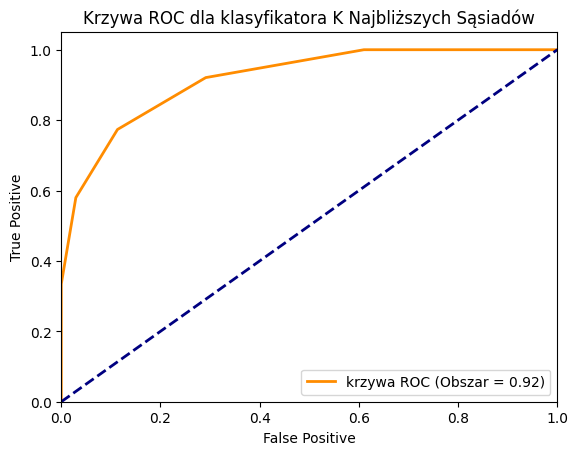

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
print("Klasyfikator K Sąsiadów")
kn.fit(X_train, Y_train)
kn_acc = accuracy_score(Y_test, kn.predict(X_test))
kn_prec = precision_score(Y_test, kn.predict(X_test))
print(F'Accuracy:',kn_acc)
print(F'Precision:',kn_prec )

print( F'Roc Auc Score:',roc_auc_score(Y_test, kn.predict(X_test)) )
print( F'Confusion Matrix:',confusion_matrix(Y_test, kn.predict(X_test)) )
print()
print( classification_report(Y_test, kn.predict(X_test)) )
print()


y_score = kn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='krzywa ROC (Obszar = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Krzywa ROC dla klasyfikatora K Sąsiadów')
plt.legend(loc="lower right")
plt.show()

Klasyfikator Bayesa(Gauss)
Accuracy: 0.8650983647701604
Precision: 0.8612383177570093
Roc Auc Score: 0.8599159501288333
Confusion Matrix: [[52758  5939]
 [ 8036 36861]]

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     58697
           1       0.86      0.82      0.84     44897

    accuracy                           0.87    103594
   macro avg       0.86      0.86      0.86    103594
weighted avg       0.86      0.87      0.86    103594




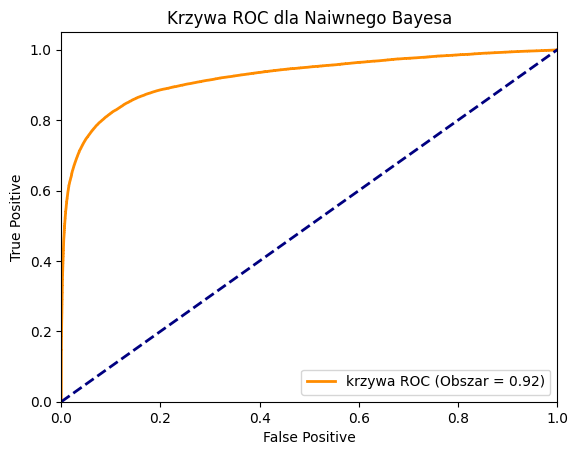

In [ ]:
from sklearn.naive_bayes import GaussianNB
gauss_bayes = GaussianNB()

print("Klasyfikator Bayesa(Gauss)")
gauss_bayes.fit(X_train, Y_train)
gauss_acc = accuracy_score(Y_test, gauss_bayes.predict(X_test))
gauss_prec = precision_score(Y_test, gauss_bayes.predict(X_test))
print(F'Accuracy:',gauss_acc)
print(F'Precision:',gauss_prec)

print( F'Roc Auc Score:',roc_auc_score(Y_test, gauss_bayes.predict(X_test)) )
print( F'Confusion Matrix:',confusion_matrix(Y_test, gauss_bayes.predict(X_test)) )
print()
print( classification_report(Y_test, gauss_bayes.predict(X_test)) )
print()


y_score = gauss_bayes.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='krzywa ROC (Obszar = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Krzywa ROC dla Naiwnego Bayesa')
plt.legend(loc="lower right")
plt.show()

Wyniki powyższych kodów wskazują na to, że oba klasyfikatory uzyskały całkiem zadowalające wyniki:
* Naiwny Bayes 86%
* K-Sąsiadów 84%

## Wnioski:
Najlepiej klasyfikującymi cechami ten zbiór danych były:Łatwość rezerwacji online,klasa jaką leciał pasażer, rodzaj podróży oraz zasięg WIFI podczas lotu.

Z koleji najgorszymi cechami jakich mogliśmy użyć do klasyfikacji okazały się:Płeć, jedzenie i napoje serwowane podczas lotu,opóźnienie odlotu oraz przylotu.

Podczas analizy zauważyliśmy rówież, iż to czy pasażer jest lojalny czy też nie wcale nie wpływa na to jak bardzo zadowolony będzie z lotu.

Po przeanalizowaniu naszych danych przy pomocy dwóch klasyfikatorów otrzymaliśmy dokłdaność na poziomie 84-86%.

Mogliśmy również zauważyć dość oczywistą korelację pomiędzy opóźnieniem wylotu oraz przylotu samolotu.

Znaleźliśmy również zestaw cech które są ze sobą skorelowane pod warunkiem, że załoga dobrze wykonuje swoje zadania , tymi chechami były:
* Czystość
* Zadaowolenie z miejsca
* Jakość serwowanego jedzenia i napojów
* Rozrywki podczas lotu
